In [19]:
import numpy as np # бибилиотека работы с векторами
import pandas as pd # библ работы с данными(таблицами)
import matplotlib.pyplot as plt # библиотека визуализации
from datetime import datetime

In [4]:
money = pd.read_csv("RC_F31_01_2020_T23_10_2020 (1).csv", sep = ";")

In [5]:
money.head(5)

,nominal,data,curs,cdx
0,1,31.01.2020,"63,0359",Доллар США
1,1,01.02.2020,"63,1385",Доллар США
2,1,04.02.2020,"63,9091",Доллар США
3,1,05.02.2020,"63,4342",Доллар США
4,1,06.02.2020,"63,1742",Доллар США


In [6]:
target_columns = ["data", "curs"]
print(target_columns)
print(target_columns[0])


['data', 'curs']
data


In [7]:
money = money[target_columns]

In [8]:
money.head(5)

,data,curs
0,31.01.2020,"63,0359"
1,01.02.2020,"63,1385"
2,04.02.2020,"63,9091"
3,05.02.2020,"63,4342"
4,06.02.2020,"63,1742"


In [10]:
real_columns = ["date", "value"]

In [11]:
money.columns = real_columns

In [12]:
money.head(5)

,date,value
0,31.01.2020,"63,0359"
1,01.02.2020,"63,1385"
2,04.02.2020,"63,9091"
3,05.02.2020,"63,4342"
4,06.02.2020,"63,1742"


In [14]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    179 non-null    object
 1   value   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [16]:
def convert_money(string):
    return float(string.replace(",","."))

In [18]:
convert_money("123.123")

123.123

In [33]:
def convert_date(string):
    return datetime.strptime(string,"%d.%m.%Y")

In [34]:
convert_date("31.01.2020")

datetime.datetime(2020, 1, 31, 0, 0)

In [36]:
money["date"] = money["date"].apply(convert_date)
money["value"] = money["value"].apply(convert_money)


In [37]:
money.head(5)

,date,value
0,2020-01-31,63.0359
1,2020-02-01,63.1385
2,2020-02-04,63.9091
3,2020-02-05,63.4342
4,2020-02-06,63.1742


In [38]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    179 non-null    datetime64[ns]
 1   value   179 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


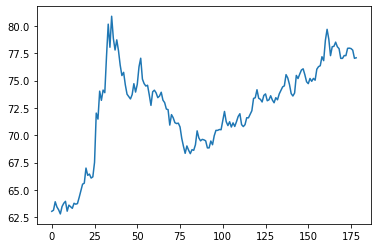

In [39]:
plt.plot(money["value"])

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
money["id"] = range(len(money))


In [45]:
money.head(5)

,date,value,id
0,2020-01-31,63.0359,0
1,2020-02-01,63.1385,1
2,2020-02-04,63.9091,2
3,2020-02-05,63.4342,3
4,2020-02-06,63.1742,4


In [65]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    179 non-null    datetime64[ns]
 1   value   179 non-null    float64       
 2   id      179 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 3.6 KB


In [48]:
end = 150

In [69]:
X = money[["id"]][:end]
y = money["value"][:end]

In [70]:
reg = LinearRegression().fit(X, y)

In [71]:
X_test = money[["id"]][end:]
y_test = money["value"][end:]

In [72]:
y_pred = reg.predict(X_test) #прогноз


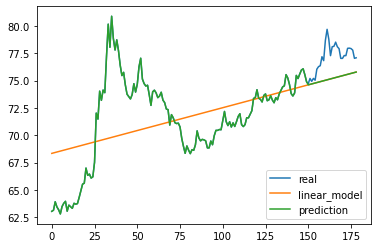

In [74]:
plt.plot(money["value"], label = "real")
plt.plot(reg.predict(money[["id"]]), label = "linear_model")
plt.plot(list(y) + list(y_pred), label = "prediction")
plt.legend()